# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.004
0.0
0.0
-0.002
0.0
0.003
0.002
0.0
0.001
0.989
0.989
0.987
0.987
1.973
1.973
1.971
1.971
2.947
2.947
2.946
2.946
3.948
3.948
3.947
3.946
4.945
4.945
4.95
4.949
4.949
5.954
5.954
5.953
5.952
6.704
6.704
6.702
6.701
7.461
7.46
7.458
7.458
8.452
8.457
8.457
8.457
8.456
9.441
9.446
9.448
9.446
9.446
10.448
10.448
10.446
10.446
11.434
11.433
11.431
11.431
12.397
12.401
12.402
12.402
12.401
13.377
13.381
13.384
13.383
13.383
14.066
14.066
14.065
14.065
14.746
14.746
14.743
14.744
15.749
15.749
15.748
15.748
16.735
16.735
16.735
16.734
17.733
17.732
17.731
17.731
18.712
18.712
18.711
18.711
19.71
19.71
19.708
19.708
20.692
20.691
20.69
20.691
20.691
21.315
21.314
2

58.199
58.198
58.2
58.2
58.229
58.261
58.332
58.405
58.404
58.441
58.478
58.478
58.505
58.505
58.505
58.505
58.505
58.505
58.504
58.504
58.504
58.504
58.504
58.503
58.503
58.503
58.503
58.504
58.504
58.503
58.503
58.502
58.502
58.502
58.502
58.502
58.501
58.501
58.501
58.5
58.5
58.5
58.5
58.5
58.5
58.5
58.499
58.499
58.499
58.499
58.497
58.497
58.497
58.497
58.497
58.497
58.497
58.497
58.497
58.497
58.497
58.495
58.494
58.494
58.495
58.524
58.556
58.589
58.625
58.66
58.697
58.698
58.733
58.732
58.756
58.756
58.756
58.756
58.756
58.756
58.756
58.738
58.772
58.771
58.769
58.769
58.769
58.771
58.771
58.769
58.769
58.769
58.767
58.766
58.766
58.766
58.768
58.769
58.769
58.768
58.768
58.922
58.922
58.962
58.962
58.959
58.963
58.961
58.961
58.96
58.962
59.377
59.377
59.373
59.379
59.379
59.377
59.376
59.377
59.845
59.845
59.885
59.885
59.886
59.886
59.886
59.885
60.049
60.11
60.111
60.113
60.11
60.108
60.108
60.108
60.449
60.449
60.488
60.488
60.489
60.489
60.48
60.48
60.484
60.971
60.971
61

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1394,2788,61.006
1395,2790,61.006
1396,2792,61.006
1397,2794,61.006


<IPython.core.display.Javascript object>


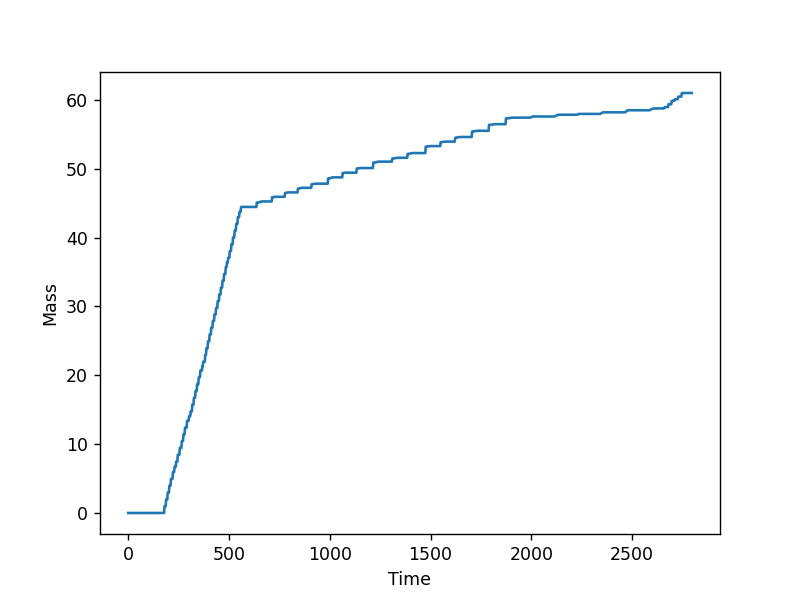

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
#mass_df.to_csv('mass_data/MassProfile_260123_S73-78.csv')